In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('./agaricus-lepiota.csv')
X = data.drop("edibility", 1)
#X = np.array(X)

# Class
y = data.edibility
print(X.shape)
print(y)

(8124, 22)
0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: edibility, Length: 8124, dtype: object


In [3]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = pd.get_dummies(X)
print(X.shape)

skb = SelectKBest(chi2, k=3)
print(data.shape)
skb.fit(X,y)
X_new = skb.transform(X)

print(X_new.shape)
np.array(X.columns)[skb.get_support(indices=True)]

(8124, 117)
(8124, 23)
(8124, 3)


array(['odor_f', 'odor_n', 'stalk-surface-above-ring_k'], dtype=object)

* Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?
* Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?
* Do you see any overlap between the PCA features and those obtained from feature selection?

Original space: (8124, 117)
PCA space: (8124, 3)
[94]
[96]
[110]
RESULT spore-print-color_h ring-type_p habitat_d


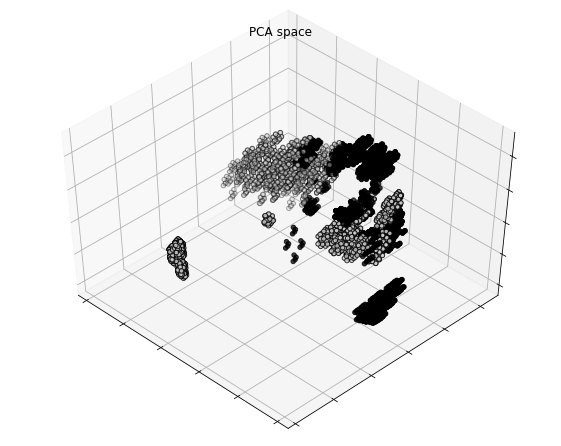

In [4]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

#np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

print("Original space:", X.shape)
pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)

print("PCA space:", Xpca.shape)
#########################
# Plot PCA
#########################
fig = plt.figure(2, figsize=(8, 6))
plt.clf()
ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=135)

plt.cla()
y = y.replace(to_replace=['e', 'p'], value=[0,5])

ax2.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
ax2.set_title("PCA space")
import heapq
print(heapq.nlargest(1, range(len(pca.components_[0])),abs(pca.components_[0]).take))
print(heapq.nlargest(1, range(len(pca.components_[1])),abs(pca.components_[1]).take))
print(heapq.nlargest(1, range(len(pca.components_[2])),abs(pca.components_[2]).take))
print("RESULT", X.columns[96], X.columns[94], X.columns[110])
plt.draw()
plt.show()

y = data.edibility

In [5]:
print(Xpca.shape)

(8124, 3)


Ut i fra verdiene fra feature selection så fekk vi odor_f, odor_n og stalk-surface-above-ring_k,
men i PCA fekk vi spore-print-color_h ring-type_p habitat_d

# ØVING 3 del 3/3
* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

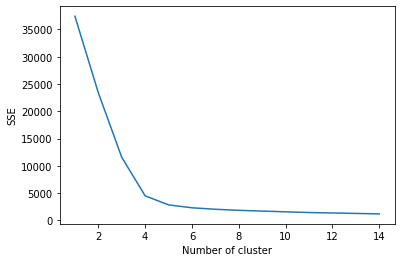

Ser ut i frå grafen at det er 4 clusters som er best


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.DataFrame(Xpca, columns=["spore-print-color_h", "ring-type_p", "habitat_d"])
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
print("Ser ut i frå grafen at det er 4 clusters som er best")

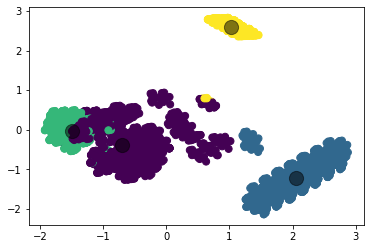

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(Xpca)
y_kmeans = kmeans.predict(Xpca)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);